# データサイエンス入門

このノートブックは、YouTubeで紹介している以下の講義用です。

https://www.youtube.com/playlist?list=PL4Y-mUWLK2t0Vy2sUIXK3ItMX0s7CvoB_

これ単体でも学習できますが、動画の解説を前提に作成している部分があるので、ぜひ動画を合わせて見ていただけると嬉しいです。

## (復習)データサイエンスの7ステップ

データサイエンスには、以下7つのステップがありました。

1. 目的・課題の特定
2. データの取得・収集
3. データ理解・データの可視化
4. データの加工・前処理
5. 機械学習モデルの作成
6. 評価・テスト
7. レポーティング or アプリケーション化

この動画シリーズでは、「2. データの取得・収集」から「6. 評価・テスト」までを体験していきます。

基本的に、各セクションごとに動画を区切っていきます。なので途中で休憩しながら学習したり、必要な部分だけピンポイントで復習に使っていただけると良いかと思います。

# データの取得・収集

今回使っていくデータは、Kaggleからダウンロードした**タイタニック号のデータ**です。

https://www.kaggle.com/c/titanic

あとはダウンロードしたデータをPythonで使えるようにすれば、さっそくデータ分析を開始できます。

<br>

今回の動画シリーズでは、**Google Colaboratory**を使って学習を進めていきます。

*※ネット回線に繋ぐのが面倒であれば、お手元のPCに入っているAnacondaでも学習できます。その場合は、ファイルパスを変更するだけで同じように学習できるようになっています！*

<br>

Google Colabでデータを読み込むためには、まず**Google Driveをマウントする必要があります。**

要するにGoogle Driveを使えるようにしないといけないってことです！何も設定しなければ、Google Driveに入っているデータを読み込むことはできません。

<br>

というわけで、さっそくGoogle Driveのマウントからやっていきましょう。

Google Driveをマウントするには、以下のコードを実行します。コードを実行すると、URLと入力ボックスが出現するはずです。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Google Driveの認証を済ませるには、上記のURLにアクセスして認証コードをコピーします。

その後、認証コードを入力ボックスにペーストすれば、Google Driveのマウントが完了です。

<br>

これでデータサイエンスを体験する準備ができました。次回からPythonを使ってデータに触れていきましょう！


# データ理解・データの可視化

まずはじめに、タイタニック号のデータを理解することから始めます。

- どんなデータが入っているんだろう？
- このデータには、どんな特徴があるんだろう？
- 欠けているデータはあるのかな？

上記のような内容を、このステップで見ていくことになります。

<br>

データサイエンスと聞くと、とりあえず「*機械学習を使って色々やっていくんですよね〜？*」と思われるかもしれません。

でも、その機械学習を使うためにも、まずはデータを理解しないといけません。

内見をせず家を買ったりしませんよね？それと同じです。まずは、中身を知ることから始めていきます。

<br>

というわけで、まずはライブラリのインポートと、ファイルの読み込みから始めていきましょう。

## ライブラリのインポート

今回使うライブラリをインポートします。

*※Pythonをはじめて学習する場合は、ライブラリのインポート = Pythonを便利にするためのおまじないだと思ってください!*

In [1]:
# ライブラリにインポート
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

今回は、上記4つのライブラリをインポートしました。

これらのライブラリはデータ分析するとき、ほぼマストで必要になります。

<br>

各ライブラリの特徴は、以下のとおりです。

- numpy : 行列計算や数値を扱いやすくするライブラリ。pandasと合わせて使うことが多いです。
- pandas : データを扱いやすくするライブラリ。かなり重要です。
- matplotlib : グラフを作成するためのライブラリ。
- seaborn : グラフをキレイかつ簡潔に書くためのライブラリ。

まさにデータ分析といった感じですよね。


今回は、これらのライブラリで使う部分だけピックアップして紹介していきます。

*※各ライブラリは、できることがたくさんあるので、それだけでかなりのボリュームになってしまいます...。需要があれば、各ライブラリの使い方を詳しく紹介する動画を作っていきたいと思うので、コメントにてお知らせしていただけると嬉しいです><*

<br>

それでは、これらのライブラリを使って「データ理解・データの可視化」をやっていきましょう。

## データの読み込み

まずは今回使うデータの読み込みからはじめていきます。

Python単体を使ってデータの読み込みをすることもできますが、ここでは`Pandas`を使うのが一般的です。

<br>

`Pandas`を`pd`と省略して使えるようにしておいたので、以下のように書くことでデータの読み込みが完了します。

In [2]:
# local
# dir_path = './titanic/'

# dir_path = '/content/drive/MyDrive/DataScience/titanic/' # google colab

# 学習データの読み込み
train_df = pd.read_csv('./titanic/train.csv')

# テストデータの読み込み
test_df = pd.read_csv('./titanic/test.csv')



これだけで今回使うCSVファイルを読み込めました。

この`pd.read_csv`を使うことで、表形式でデータの読み込みができます。(=表形式のことを、データフレームと言います。)

## どんなデータが入っているんだろう？

それでは、どんなデータが入っているのか確認していきたいと思います。

読み込んだファイルの中身を確認していきたいのですが、それには`train_df.head()`のように書いてあげます。

In [3]:
# 学習データの先頭5行を確認してみる
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


`train_df.head()`を使うことで、読み込んだデータの先頭5行が表示されました。

*※`df.head()`は、デフォルトで先頭5行を表示するように設定されています。*

<br>

ヘッダーを見ると、色々なデータが入っていることが分かります。

なお、各ヘッダーに対応する縦列のことを**カラム(Column)**と言います。

現場に出ると、各カラムが「どういうデータなのか」といった説明が書いてあるドキュメント(=項目定義書)が準備されていることが多いです。

<br>

今回データをダウンロードしたKaggleにも各カラムの説明が書いてありますが、すべて英語のテキストになっています。

なので、以下に日本語のカラム説明を書いておきました。

<table>
    <tr>
        <th>項目</th>
        <th>定義(各項目の説明)</th>
    </tr>
    <tr>
        <td>PassengerId</td>
        <td>乗客のID(ユニーク)</td>
    </tr>
    <tr>
        <td>Survived</td>
        <td>生存フラグ（0=死亡、1=生存）</td>
    </tr>
    <tr>
        <td>Pclass</td>
        <td>チケットのクラス（1が最も良いクラス）</td>
    </tr>
    <tr>
        <td>Name</td>
        <td>乗客の名前</td>
    </tr>
    <tr>
        <td> Sex</td>
        <td>性別（male=男性、female＝女性）</td>
    </tr>
    <tr>
        <td>Age</td>
        <td>乗客の年齢</td>
    </tr>
    <tr>
        <td>SibSp</td>
        <td>同乗している兄弟/配偶者の数</td>
    </tr>
    <tr>
        <td>parch</td>
        <td>同乗している親/子供の数</td>
    </tr>
    <tr>
        <td>ticket</td>
        <td>チケット番号</td>
    </tr>
    <tr>
        <td>fare</td>
        <td>料金</td>
    </tr>
    <tr>
        <td>cabin</td>
        <td>客室番号</td>
    </tr>
    <tr>
        <td>Embarked</td>
        <td>タイタニック号に乗った港</td>
    </tr>
</table>

今回使うデータは、上記のような項目になっています。

<br>

学習データには、このテーブルに書かれているすべての項目が入っていますね。

それでは、テストデータの中身ものぞいてみましょう。学習データと同様に`test_df.head()`を使うことで確認できます。

In [4]:
# テストデータの先頭5行を確認してみる
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


そうすると、学習データと比較して、ヘッダーが少ないように感じます。

実際に、各データの大きさを確認してみましょう。データの大きさを確認するには、`df.shape`を使ってあげます。

In [5]:
# データフレームの大きさ
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


そうすると(〇〇, 〇〇)のような形で出力されました。これは(行数, 列数)を意味しています。

最初は行と列がややこしいかもしれません。行は縦の数で、列は横の数になります。

なので今回でいうと、行数は乗客の数、列数はヘッダー情報の数です。

<br>

以上のことを踏まえると、テストデータは乗客の数も少ないですが、同時にヘッダー情報も1つ少なくなっています。

学習データと比較して何が足りなくなっているのか確認してみると、**`Survived`が抜け落ちている**ことが分かります。

<br>

「こんなデータじゃ使い物にならないじゃないか...！」と思われるかもしれませんが、そんなことはありません。

なぜなら`Survived`、つまり「生存しているか否か」が今回予測することだからです。

つまり、**学習データ(=train_df)を使って、テストデータ(=test_df)の人たちが「生存するか否か」を当てるのが、今回予測したいこと**になります。

## このデータには、どんな特徴があるんだろう？

どんなデータが入っているのか分かったところで、次にどのような特徴があるのか確認していきましょう。

### データの連結

その前に、学習データとテストデータを連結しておきましょう。データを見ていくとき、学習データとテストデータが分かれている必要がないですし、分けておくと同じコードを2回実行する必要が出てきてしまうので！

*※今回はKaggleを使っているので、丁寧に学習データとテストデータに分割されていますが、通常はすべてまとまったデータになっています。*

<br>

データを縦に連結するときは、以下のように`pd.concat()`を使ってあげます。

In [6]:
# 学習データとテストデータを連結する
df = pd.concat([train_df, test_df], ignore_index=True)

この1行で、データの連結が完了しました。

`ignore_index=True`としておくことで、連結するときのインデックス番号(=1番左の番号)を振り直しできます

*※逆に「`ignore_index=True`を付けないとどうなるか？」は、ぜひ試してみてください！*

<br>

実際に、うまく連結できているか確認してみましょう。データの大きさを見るときは、`df.shape`でしたね！

In [7]:
# 連結したデータの大きさを確認する
df.shape

(1309, 12)

そうすると、(1309, 12)と表示されました、学習データが891行、テストデータが418行だったのでしっかりと連結できていることが分かります。

ちなみに、テストデータは`Survived`の列がないので、学習データと連結すると該当部分が空になっています。

<br>

これを確認したいのですが、そのためには`df.tail()`を使ってあげます。`df.head()`が先頭5行だったのに対して、`df.tail()`は最後の5行を確認できます。

In [8]:
# 最後の5行を確認
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


確認してみると、`Survived`の中身が空になっていることが分かりますね。

これで学習データとテストデータが、しっかり連結できていることが分かりました。

<br>

あとは、各データの特徴を確認していきましょう。

### データの可視化

各カラム(=列)に、どんなデータが入っているのか確認するときは、グラフにしてデータの可視化をしてあげると良いです。これは、自分で見るときもそうだし、相手に見せるときも含めてですね！

<br>

細かく見ていくと、それだけで3本くらいの動画にできてしまうので、今回は簡単に以下の項目だけデータの可視化をやっていきたいと思います。

- 性別 : どんな内訳になっているのか？
- チケットのクラス : どんな階級の人が多いのか？

なお、性別やチケットのクラスなど、各カテゴリーの数値を確認したいときは、**棒グラフ(barplot)**を使ってあげると良いです。

<br>

今回は練習のため「性別 : どんな内訳になっているのか？」を確認する3つの方法を紹介していきます。

#### Matplotlibで表示する方法

`matplotlib`で男女の内訳を確認するには、まず各性別ごとの人数を集計する必要があります。

つまり、①性別ごとにグループ分け(=男性と女性に分ける)して、②各性別ごとにカウントするってことになります。

<br>

これをコードで書いていきましょう。以下のように書くと、性別ごとの集計をおこなえます。

In [9]:
# ①性別ごとにグループ分けして、②各性別ごとにカウントする
df.groupby('Sex').agg({'Sex':'count'})

,Sex
Sex,
female,466
male,843


これで、男性と女性の数を集計できました。

この集計結果を、変数`tmp`に入れておきたいと思います。なお、変数に格納するとき、カラム名の`Sex`は`count_sex`とかに変更しておきましょう。

In [10]:
# 集計結果を変数tmpに格納する
tmp = df.groupby('Sex').agg({'Sex':'count'}).rename(columns={'Sex':'count_sex'})

In [11]:
tmp

,count_sex
Sex,
female,466
male,843


これで良いですね。あとは、グラフにするだけです。

`matplotlib`で棒グラフを作成するには、`plt.bar(x軸で使う列(=カラム), y軸で使う列(=カラム))`と書いてあげます。

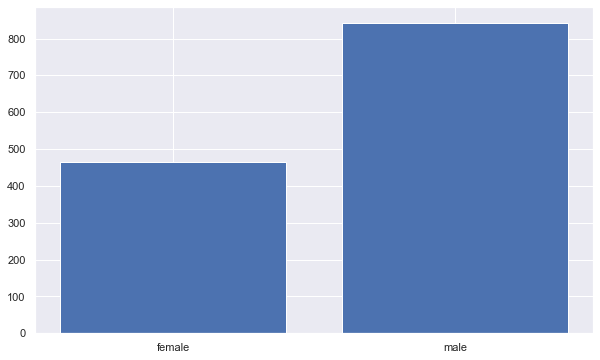

In [12]:
# グラフの大きさを設定
plt.figure(figsize=(10, 6))

# 性別の数を確認してみる
plt.bar(tmp.index, tmp.count_sex)
plt.show()

これで、各性別の数を確認できました。グラフにすると、直感的に男性が多いと分かりますね。

#### Pandasで表示する

なお、今回`matplotlib`を使って書いたコードは、`Pandas`だけでも実現可能です。

`Pandas`を使う場合、以下のように`tmp`の後に少し書き足すだけで良いので、簡単なグラフ作成なら、こちらを選択すると良いですね。

<AxesSubplot:xlabel='Sex'>

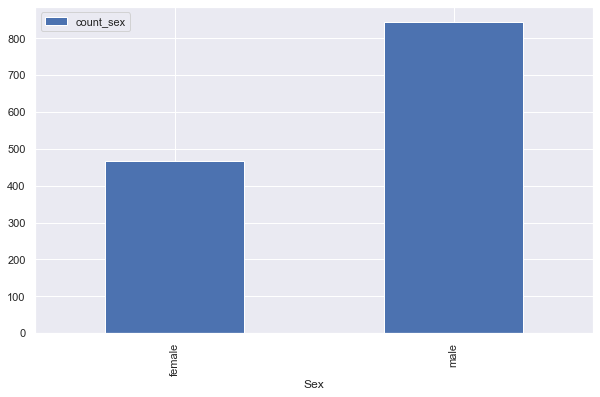

In [13]:
# pandasで棒グラフを作成する
tmp.plot(kind='bar', figsize=(10, 6))

<AxesSubplot:xlabel='Sex'>

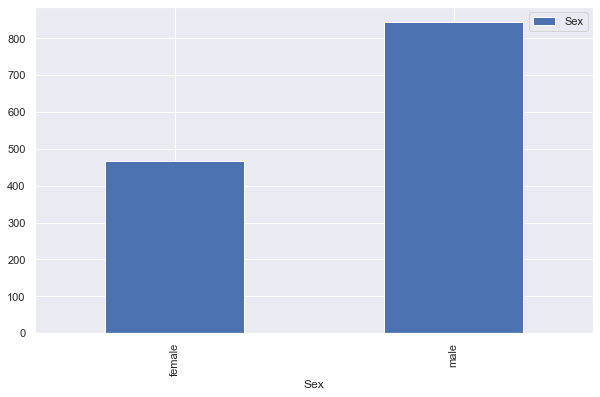

In [14]:
# pandasで棒グラフを作成する
df.groupby('Sex').agg({'Sex':'count'}).plot(kind='bar', figsize=(10, 6))

<AxesSubplot:xlabel='Embarked'>

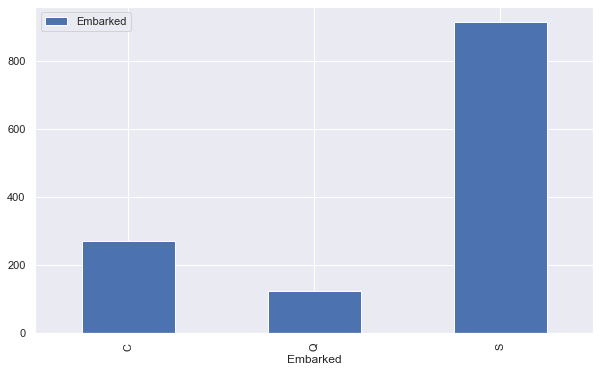

In [15]:
# pandasで棒グラフを作成する
df.groupby('Embarked').agg({'Embarked':'count'}).plot(kind='bar', figsize=(10, 6))

#### Seabornで表示する

`matplotlib`や`pandas`でグラフを作成するとき、いったん集計を挟んでから棒グラフを作成しました。

でも、これは少し面倒に感じますし、今は「女性・男性」の並び順になっていますが、「男性・女性」の並び順に変更した方が、感覚的に分かりやすい気がします。

さらに、それぞれの棒に色付けしてあると、もっと見やすいグラフになりそうです。

<br>

そんなときは`seaborn`を使ってあげるとお悩み解決できて、`sns.countplot()`を使うことで簡単に男女の人数をカウントした棒グラフを作成できます。

/Users/kimuratoshiyuki/miniforge3/envs/automl/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


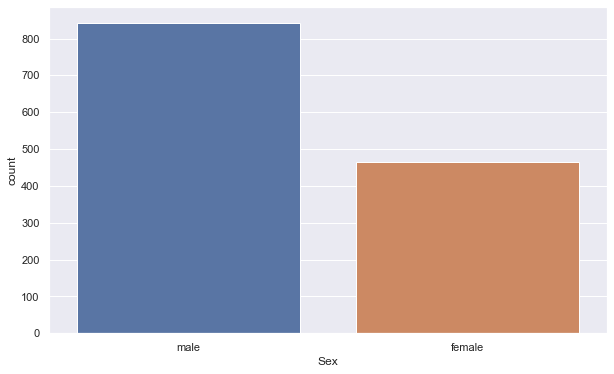

In [16]:
# グラフの大きさを設定
plt.figure(figsize=(10, 6))

# 性別の数を確認してみる
sns.countplot('Sex', data=df)
plt.show()

`seaborn`を利用すると、集計するコードを書かなくて良いですし、色付けもよしなにやってくれます。

色々な意味でラクできるので、特に棒グラフの作成をするなら`seaborn`を使ってあげると良いですね。

<br>

もちろん、男性と女性のように2種類を表示するときだけではなく、それ以上の場合でも色付けしてくれます。

チケットのクラス(=`Pclass`)でも、`seaborn`を使って可視化してみましょう。

/Users/kimuratoshiyuki/miniforge3/envs/automl/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


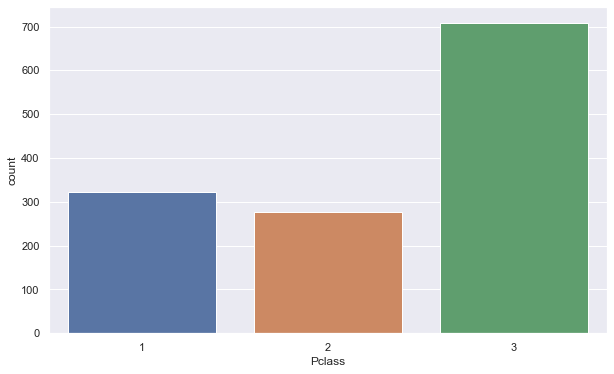

In [17]:
# グラフの大きさを設定
plt.figure(figsize=(10, 6))

# 性別の数を確認してみる
sns.countplot('Pclass', data=df)
plt.show()

このように、3種類あってもキレイに表示できました。

`Pclass`は1番が最も良いので、「やっぱり高級なチケットは、1番お客さんが少ないのかな...」と思いきや、意外にも2番目(=真ん中のクラス)が最も少ないことが分かりましたね。

<br>

このようにデータを見てあげると色々なことが分かってきます。

さらにデータの可視化を深掘ることで、機械学習で使うカラム(=特徴量)を決めていくのですが、今回はこれくらいにして次に進みたいと思います。

ただ、機械学習で使うカラムは決めておく必要があるので、今回は「以下4つの特徴量を使う」としましょう。

- チケットのクラス
- 年齢
- 性別
- 港

### 欠けているデータはあるのかな？

データの可視化と一緒にやるべきことが、欠損値の確認です。

欠けているデータがあるなら、それを補ったり削除したりする必要があります。

欠損値を補完する理由は、"基本的に"欠損値があると機械学習でうまく予測できないからです。

*※"基本的に"と言っているからには、欠損値があっても機械学習できるアルゴリズムが存在します。ただ、ほとんどの機械学習アルゴリズムで欠損値の補完が必要になります。*

<br>

欠損値の確認方法はカンタンで、以下のように書くだけでOKです。

In [18]:
# データ内の欠損値を確認する
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

上記のように書くことで、各項目で欠けているデータを確認できます。

例えば`Cabin`=客室番号は、そのほとんどが欠けてしまっていることが分かります。

<br>

他にも、乗客の年齢(=`Age`)やタイタニック号に乗った港(=`Embarked`)、またチケットの料金(=`Fare`)が欠けていることが分かります。

*※`Survived`はテストデータに元から入っていなかったので、気にしなくて大丈夫です!*

<br>

このように、欠損値の有無とその数を確認することで、欠損値の対処方法を考えていきます。

では、どのように欠損値を埋めていくのか。それは、次のステップで紹介していきます。

In [20]:
conda install -c conda-forge scikit-plot

Solving environment: done

## Package Plan ##

  environment location: /Users/kimuratoshiyuki/miniforge3/envs/automl

  added / updated specs:
    - scikit-plot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-plot-0.3.7          |             py_1          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          25 KB

The following NEW packages will be INSTALLED:

  scikit-plot        conda-forge/noarch::scikit-plot-0.3.7-py_1



scikit-plot-0.3.7    | 25 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [26]:
from pycaret.classification import *

s = setup(df, target = 'Survived')

,Description,Value
0,session_id,7332
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(1309, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [27]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8240,0.8076,0.7457,0.7713,0.7568,0.6191,0.6207,0.0220
gbc,Gradient Boosting Classifier,0.8223,0.8665,0.6488,0.8354,0.7277,0.5992,0.6116,0.0760
lightgbm,Light Gradient Boosting Machine,0.8207,0.8577,0.7233,0.7758,0.7466,0.6083,0.6110,0.0250
lr,Logistic Regression,0.8126,0.8602,0.6970,0.7745,0.7325,0.5889,0.5918,0.2780
ridge,Ridge Classifier,0.8093,0.0000,0.7057,0.7616,0.7317,0.5841,0.5859,0.0270
ada,Ada Boost Classifier,0.8029,0.8447,0.6225,0.8016,0.6962,0.5548,0.5673,0.0390
rf,Random Forest Classifier,0.8013,0.8530,0.6708,0.7638,0.7135,0.5622,0.5657,0.0630
et,Extra Trees Classifier,0.8012,0.8537,0.6708,0.7665,0.7135,0.5623,0.5669,0.0630
svm,SVM - Linear Kernel,0.7172,0.0000,0.4243,0.6784,0.4637,0.3243,0.3617,0.0220
knn,K Neighbors Classifier,0.7140,0.7346,0.5393,0.6329,0.5786,0.3654,0.3703,0.0210


In [28]:
print(best)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=7332, splitter='best')


In [29]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7419,0.7235,0.6522,0.6522,0.6522,0.4470,0.4470
1,0.7903,0.7798,0.7391,0.7083,0.7234,0.5547,0.5550
2,0.9194,0.9181,0.9130,0.8750,0.8936,0.8287,0.8292
3,0.8226,0.8233,0.8261,0.7308,0.7755,0.6298,0.6330
4,0.7742,0.7402,0.6087,0.7368,0.6667,0.4983,0.5035
5,0.8871,0.8746,0.8261,0.8636,0.8444,0.7559,0.7564
6,0.7903,0.7709,0.6957,0.7273,0.7111,0.5467,0.5470
7,0.8065,0.7837,0.6957,0.7619,0.7273,0.5778,0.5792
8,0.8226,0.8011,0.7273,0.7619,0.7442,0.6085,0.6089
9,0.8852,0.8607,0.7727,0.8947,0.8293,0.7435,0.7481


In [31]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=7332, splitter='best')


In [32]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6290,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6129,0.4872,0.0000,0.0000,0.0000,-0.0319,-0.0983
2,0.6452,0.5753,0.3043,0.5385,0.3889,0.1652,0.1786
3,0.6290,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6290,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6290,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6290,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6290,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8065,0.7784,0.6818,0.7500,0.7143,0.5684,0.5699
9,0.6393,0.5542,0.2727,0.5000,0.3529,0.1320,0.1436


In [34]:
final_dt = finalize_model(tuned_dt)
print(final_dt)

/Users/kimuratoshiyuki/miniforge3/envs/automl/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
/Users/kimuratoshiyuki/miniforge3/envs/automl/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
/Users/kimuratoshiyuki/miniforge3/envs/automl/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
/Users/kimuratoshiyuki/miniforge3/envs/automl/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       random_state=7332, splitter='best')


In [35]:
final_dt2 = finalize_model(dt)
print(final_dt2)

/Users/kimuratoshiyuki/miniforge3/envs/automl/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
/Users/kimuratoshiyuki/miniforge3/envs/automl/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
/Users/kimuratoshiyuki/miniforge3/envs/automl/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
/Users/kimuratoshiyuki/miniforge3/envs/automl/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=7332, splitter='best')


In [36]:
test_pred = predict_model(final_dt, data=test_df)  # 予測
test_pred.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,0.6162
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0,0.6162
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,0.6162
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,0.6162
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0,0.6162


In [37]:
# 形式を整える
subm_data = test_pred[["PassengerId", "Label"]]  # 列を抜き出す
subm_data = subm_data.rename(columns={"Label" : "Survived"})  # 列名の変更

# 提出用のcsvファイルを保存
subm_data.to_csv("submission_titanic.csv", index=False)

subm_data

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,0.0
415,1307,0.0
416,1308,0.0


In [38]:
subm_data.groupby('Survived').agg({'Survived':'count'})

,Survived
Survived,
0.0,418


In [39]:
test_pred = predict_model(final_dt2, data=test_df)  # 予測
test_pred.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,1.0


In [40]:
# 形式を整える
subm_data = test_pred[["PassengerId", "Label"]]  # 列を抜き出す
subm_data = subm_data.rename(columns={"Label" : "Survived"})  # 列名の変更

# 提出用のcsvファイルを保存
subm_data.to_csv("submission_titanic_modelDt.csv", index=False)

subm_data

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [52]:
# 小数点にしてから整数にする
subm_data['Survived'] = subm_data['Survived'].astype(float).astype(int)

In [54]:
subm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [55]:
# 提出用のcsvファイルを保存
subm_data.to_csv("submission_titanic_modelDt.csv", index=False)


# データの加工・前処理・特徴量エンジニアリング

データの中身を確認したら、機械学習で使うためのデータに変換していきます。

このフェーズを、「データの前処理」とか「データ加工」と言います。

また、機械学習で良い結果を出すために、新しいカラムを作成することを特徴量エンジニアリングと言います。機械学習で使うカラム(=特徴量)を作り出す(=エンジニアリング)ってことですね。

<br>

データの可視化で確認したとおり、タイタニックのデータには欠損値が存在することが分かりました。

今回は、欠損値が存在したカラムの中でも、乗客の年齢(=`Age`)と出発した港(=`Embarked`)を使っていきたいです。

なので、このステップでは、データ前処理として「欠損値の補完」をやっていきたいと思います。

## 年齢とタイタニック号に乗った港の欠損値を埋める

そもそも欠損値の対処方法として、補完するだけではなく、削除する方法もあります。

例えば、年齢が分からない乗客は使わないってことですね。

<br>

でも、今回使っているタイタニックデータは、全部で1309件しかありません。

元からデータ量が多いわけではないので、年齢が分からない乗客を削除してしまうと、さらにデータ量が減ってしまいます。

<br>

こういった背景があり、今回は欠損値を「削除」するのではなく「補完」する方法を選びました。

### Embarked

まずは、タイタニック号に乗った港の欠損値補完をしていきましょう。

そもそも`Embarked`にどれくらいの欠損があったか、再度確認しておきたいと思います。

In [56]:
# Embarkedの欠損値を確認する
df['Embarked'].isnull().sum()

2

`Embarked`は、2人の乗客だけデータが欠けていることが分かりました。

全体から考えて、そこまで欠損値が多いわけではないですね。なので、今回は最も乗客が多かった港で補ってあげたいと思います。

<br>

タイタニック号に乗った港の数を確認したいのですが、それには`sns.countplot()`を使ってあげると、カンタンに確認できましたね。

<AxesSubplot:xlabel='Embarked', ylabel='count'>

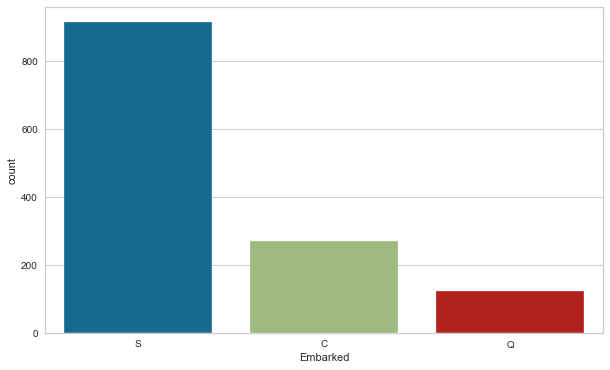

In [57]:
# グラフの大きさを設定
plt.figure(figsize=(10, 6))

# 乗船した港を確認する
sns.countplot('Embarked', data=df)

可視化してみると、ほとんどの乗客が`S`という港から乗ってきたことが分かります。

というわけで、欠けている2箇所を`S`で補っていきましょう。欠損値を補完するには、`fillna("補完したい値")`のように書いてあげます。

<br>

なお、データに変更を加える前に、`df.copy()`を使って元データをコピーしてから欠損値の補完をしていきたいと思います。

In [58]:
# 元データをコピー
df2 = df.copy()

# 欠損値の補完
df2['Embarked'] = df2['Embarked'].fillna('S')

このように書くことで、出発した港`Embarked`の補完が完了しました。

ちゃんと補完できているか確認するには、以下のように書いてあげれば大丈夫ですね。

In [59]:
# 乗船した港の欠損値を再度確認する
df2['Embarked'].isnull().sum()

0

しっかり欠損値を補完できていることが分かります。

### Age

出発した港と同様に、乗客の年齢も補完していきましょう。

まずは、乗客の年齢がどうなっているのか確認していきたいと思います。より具体的にいうと「どの年齢層の乗客が多いのか」を把握しておきたいですね。

<br>

このように、各層ごとのボリュームを見たい場合には、**ヒストグラム**を書いてあげます。`sns.distplot()`を使うと、カンタンにヒストグラムの描画できます。

今回は10代、20代のように、年齢層ごとに確認していきたいので、まずは乗客の年齢における最大値・最小値を確認しておきましょう。

<br>

最大値・最小値を確認する方法もカンタンで、以下のように書いてあげるだけです！

In [60]:
# 年齢の最小値と最大値を確認
df2['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

タイタニック号の乗客は、上が80歳、下が0歳児までいることが分かります。

ということは、乗客の年齢を8コに分割してあげると、各年代ごとのボリュームを確認できますね。

<br>

分割する数を指定してヒストグラムを描くには、`sns.distplot()`のカッコ内に`bins=8`と書いてあげます。

<AxesSubplot:xlabel='Age'>

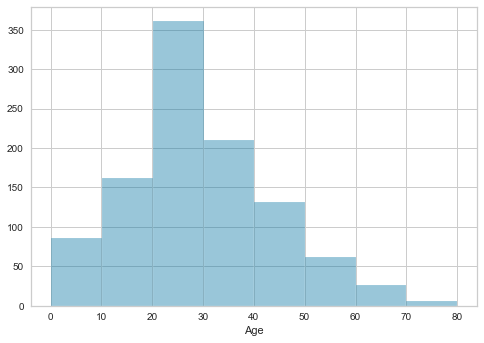

In [63]:
# ヒストグラムを作成する
sns.distplot(df['Age'], bins=8, kde=False) # bins=分割数

そうすると、各年代ごとのボリュームが可視化できました。

作成したヒストグラムを見てみると、20〜30代の人が多いですね。次いで30〜40代が多く、その次に多いのが10〜20代ということが分かります。

<br>

10〜20代が多いということは「家族連れの乗客が多いのではないか？」といった仮説が立ちますね。

そうなると、`SibSp`(=同乗している兄弟/配偶者の数)とか`parch`(=同乗している親/子供の数)も合わせて使うことで、「家族まとめて生存したか否か」といった、新しいカラム(=特徴量)を作成できそうですね。

<br>

話を戻して、今回は欠損値の補完をやっていきましょう。

どの数値で補完していくかですが、このグラフを見ると、年齢の中央値を使ってあげると良さそうです。

<br>

他にも平均値で補完する方法がありますが、グラフを見ると0〜20歳より30〜80歳が多いので、明らかに平均年齢は高くなりそうです。

実際の数値を確認してみましょう。最大値・最小値に習って、以下のように書いてあげます。

In [66]:
# 年齢の平均値と中央値を確認する
print(df2['Age'].describe())
print(df2['Age'].mean())
print(df2['Age'].median())

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64
29.881137667304014
28.0


数値で確認してみても、やはり平均年齢は中央値より高くなっています。

現実的に考えると年齢情報がない乗客263人が、みんな28歳ってことは考えにくいですが、今回は練習なので中央値で補完してしまいましょう。

<br>

欠損値を補完するときは、`Embarked`と同様に、先に`df2.copy()`でデータフレームをコピーしておきます。

あとは年齢の中央値で補完するので、先に計算して変数`age_median`に格納しておきましょう。

In [67]:
# df2をコピー
df3 = df2.copy()

# 年齢の中央値を計算
age_median = df3['Age'].median()
age_median

28.0

あとは、`Embarked`と同様に、`fillna()`を使って欠損値の補完をします。

In [69]:
# 年齢の欠損値を、計算しておいた中央値で補完する
df3['Age'] = df3['Age'].fillna(age_median)

これで欠けていた乗客の年齢情報を補完できました。

確認の意味を込めて、年齢の欠損値数を見てみましょう。

In [70]:
# 年齢の欠損値の数を確認する
df3['Age'].isnull().sum()

0

しっかり補完できました。これで、今回使いたいデータの欠損値補完はできたかと思います。

あとは、機械学習で生存したか否かを予測...と言いたいところですが、まだデータ前処理でやるべきことがあります。

<br>

具体的にいうと、乗船した港や性別のように「中身がカテゴリーになっているデータ」に対して、数値化をしてあげる必要があります。

機械学習は結局コンピューターの数値計算をするので、性別に入っている`male`や`female`の状態だと上手く機能しないんですね。

*※「上手く機能しない」というか、機械学習する段階でエラーになってしまいますm(_ _)m*

<br>

というわけで、中身がカテゴリーになっている変数に対して、データの前処理をしていきましょう。

## カテゴリカル変数の数値変換

乗船した港や性別のように、中身がカテゴリーになっているデータを「**カテゴリカル変数**」と言います。

ここでは、このカテゴリカル変数を数値に変換していきましょう。

<br>

カテゴリカル変数の数値変換は、色々な方法があるのですが、今回は以下の2つを使っていきたいと思います。

- ワンホットエンコーディング

ワンホットエンコーディングは、各カテゴリーに対して別のカラムを準備して、「該当する部分には1, そうではない部分には0」を振り分ける方法です。いわゆるフラグ付ですね。

たとえば、S, C, Qというカテゴリーを持つ乗船した港の情報であれば、以下のような変換になります。

<table>
    <tr>
        <th>...</th>
        <th>乗船した港</th>
        <th>S</th>
        <th>C</th>
        <th>Q</th>
    </tr>
    <tr>
        <td>...</td>
        <td>S</td>
        <td>1</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>...</td>
        <td>Q</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
    </tr>
    <tr>
        <td>...</td>
        <td>S</td>
        <td>1</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>...</td>
        <td>C</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
    </tr>
</table>

こうすることで、カテゴリカル変数の数値化が可能になります。

<br>

- ラベルエンコーディング

もう一つの方法が、ラベルエンコーディングです。

これは、各カテゴリーを純粋に数値変換する方法です。

<br>

ワンホット同様に、乗船した港を例に考えてみましょう。S, C, Qというカテゴリーは以下のように変換されます。

<table>
    <tr>
        <th>...</th>
        <th>変換前</th>
        <th>変換後</th>
    </tr>
    <tr>
        <td>...</td>
        <td>S</td>
        <td>0</td>
    </tr>
    <tr>
        <td>...</td>
        <td>Q</td>
        <td>2</td>
    </tr>
    <tr>
        <td>...</td>
        <td>S</td>
        <td>0</td>
    </tr>
    <tr>
        <td>...</td>
        <td>C</td>
        <td>1</td>
    </tr>
</table>

S→0, C→1, Q→2のように、ただ数値に置き換わっただけですね。

<br>

機械学習する前は、このようにワンホットエンコーディングを使ったり、ラベルエンコーディングを使うことで、カテゴリカル変数を数値に変換してあげましょう。

### 使用するデータの絞り込み

カテゴリカル変数を数値に変換する前に、機械学習で使うカラムを絞っておきましょう。

毎回大きなデータフレームを扱っていると、なんだかややこしくなってきますので。

<br>

カラムを選ぶときは、①使わないカラムを削除する方法と②使うカラムだけ指定する方法があります。

どちらを選択しても良いですが、今回は学習のために①使わないカラムを削除する方法で進めていきましょう。

<br>

データフレームからカラムを削除するには、以下のように書いてあげます。

In [73]:
# 今回使わないカラムを削除する
df4 = df3.drop(columns=['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'])

# 先頭5行を確認する
df4.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0.0,3,male,22.0,S
1,2,1.0,1,female,38.0,C
2,3,1.0,3,female,26.0,S
3,4,1.0,1,female,35.0,S
4,5,0.0,3,male,35.0,S


このように、データの絞り込みができました。

ここまでシンプルにすると、あとは性別(=`Sex`)と乗船した港(=`Embarked`)を数値に変換してあげれば、キレイなデータになりそうですね。

### カテゴリカル変数1 : 乗船した港の数値変換

まずは乗船した港から数値変換していきましょう。

このカラムを数値変換するには、ワンホットエンコーディングを使ってあげます。

<br>

データフレームの1カラムをワンホットエンコーディングするのは非常に簡単で、`Pandas`の`get_dummies()`を使ってあげるだけでカテゴリカル変数を数値に変換できます。

In [75]:
# まずはワンホットエンコーディングしてみる
pd.get_dummies(df4['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1304,0,0,1
1305,1,0,0
1306,0,0,1
1307,0,0,1


`get_dummies()`を使うことで、先ほど例に出したような数値変換が、全1309行にできました。

そうしたら元のデータフレームに連結していきたいので、いったん変数に格納してあげましょう。

<br>

また、今回の変換で作成されたカラムは、`C`とか`Q`だけだと意味不明です。

なので、追加で引数`prefix="Embarked"`を付けてあげることで、乗船した港のワンホットエンコーディングであることを明確にしておきましょう。

*※これは機械学習で問題があるというより、レポーティングの問題ですね！突然Cとか出てきても、このデータを知らない人からしたら、まったく持って意味不明です！*

In [77]:
# ワンホットの結果を変数tmp_embarkedに格納する
tmp_embarked = pd.get_dummies(df4['Embarked'], prefix='Embarked')

新たな引数`prefix`を渡すことで、元々のカラム名に各カテゴリーが書かれた形になりました。分かりやすいですね。

あとは、元のデータフレームに連結してあげますが、それには`Pandas`の`concat()`を使います。

<br>

学習データとテストデータのように縦に結合したときも使いましたが、今回のように横に連結するときも使えます。

In [81]:
# 元のデータフレームにワンホット結果を連結して、変数df5に格納する
df5 = pd.concat([df4, tmp_embarked], axis=1).drop(columns=['Embarked'])
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,0,0,1
1,2,1.0,1,female,38.0,1,0,0
2,3,1.0,3,female,26.0,0,0,1
3,4,1.0,1,female,35.0,0,0,1
4,5,0.0,3,male,35.0,0,0,1


これで乗船した港の情報を数値変換できました。この要領で性別の数値変換もやっていきましょう。

### カテゴリカル変数の変換2 : 性別

性別の変換は、ラベルエンコーディングを使っていきましょう。

というのも、性別は2種類のデータしか入っていないので、ワンホットエンコーディングしても、結局2つのカラムは同じ意味になります。

具体的に、というところで、実際に性別のカラムでワンホットエンコーディングしてみましょう。

In [82]:
# 性別をワンホットエンコーディングする
pd.get_dummies(df5['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
1304,0,1
1305,1,0
1306,0,1
1307,0,1


ワンホットした結果を見てみると分かりますが、`female`が0のとき`male`が1になり、`female`が1のとき`male`は0になっています。

このような場合「男性であるか否か」が分かれば「女性であるか否か」も同時に分かるので、2つのカラムは必要ないんですね。

<br>

ということで、性別のカラムではラベルエンコーディングを使っていきます。

ラベルエンコーディングする方法ですが、今回の場合は以下のように書くことで数値変換できます。

In [84]:
# ラベルエンコーディングした結果を反映する
df5['Sex'] = pd.get_dummies(df5['Sex'], drop_first=True)

In [85]:
# データフレームの先頭5行を確認する
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,0,0,1
1,2,1.0,1,0,38.0,1,0,0
2,3,1.0,3,0,26.0,0,0,1
3,4,1.0,1,0,35.0,0,0,1
4,5,0.0,3,1,35.0,0,0,1


元のデータフレームと比較すると、男性であれば1、そうでなく女性であれば0ということになります。

これでカテゴリカル変数の変換も完了しました。

<br>

データの前処理ができたので、あとは機械学習にかけて「生存するか否か」を予測してみましょう。

## 学習用データとテストデータに分割する

機械学習を使って生存するか否かを予測するには、「学習で使うデータ」と「生存するか否かを当てたい乗客データ」に分割しておく必要があります。

それぞれのデータのことを正確には、以下のように呼びます。

- 学習で使うデータ : 学習データ・訓練データ
- 生存するか否かを当てたい乗客データ : テストデータ

タイタニック号の問題であれば、最初に保存したファイル名が`train.csv`と`test.csv`になっていましたね。

<br>

今回は、データの可視化や前処理でこれらを連結して処理していたので、もう一度分割してあげましょう。

<br>

今は難しいことを考えずに、流れをおさえておけば大丈夫です。

機械学習をするときは、「学習データとテストデータに分けておくんだ」と覚えておきましょう。

<br>

それではデータの分割をしていくのですが、そのためには「`Survived`にデータが入っているか否か」で判断すると良いですよね。

`Survived`が空になっていることを判定するには、`df5.Servived.isnull()`のように書いてあげます。

このことを応用して、学習データとテストデータの分割は、以下のように書けます。

In [92]:
# 学習データに分割した結果を変数trainに格納する
train = df5[~df5['Survived'].isnull()] # ~はnotと同じ

# テストデータに分割した結果を変数testに格納する
test = df5[df5['Survived'].isnull()] # ~はnotと同じ

# テストデータの先頭5行を確認する
test.head()


,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
891,892,NaN,3,1,34.5,0,1,0
892,893,NaN,3,0,47.0,0,0,1
893,894,NaN,2,1,62.0,0,1,0
894,895,NaN,3,1,27.0,0,0,1
895,896,NaN,3,0,22.0,0,0,1


データを覗いてみると、しっかり分割できていることが分かりました。

テストデータに入っている`Survived`は不要なので、このタイミングで削除しておきます。

In [93]:
# Survivedを削除
test = test.drop(columns=['Survived'])
test


,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
891,892,3,1,34.5,0,1,0
892,893,3,0,47.0,0,0,1
893,894,2,1,62.0,0,1,0
894,895,3,1,27.0,0,0,1
895,896,3,0,22.0,0,0,1
...,...,...,...,...,...,...,...
1304,1305,3,1,28.0,0,0,1
1305,1306,1,0,39.0,1,0,0
1306,1307,3,1,38.5,0,0,1
1307,1308,3,1,28.0,0,0,1


In [94]:
s = setup(train, target = 'Survived')

,Description,Value
0,session_id,4186
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(891, 8)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [95]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8219,0.8395,0.6464,0.8406,0.7280,0.6004,0.6134,0.0100
lr,Logistic Regression,0.8075,0.8407,0.6719,0.7873,0.7190,0.5756,0.5843,0.2980
nb,Naive Bayes,0.8026,0.8086,0.6498,0.7907,0.7098,0.5631,0.5719,0.0030
ada,Ada Boost Classifier,0.7978,0.8388,0.6933,0.7545,0.7181,0.5619,0.5669,0.0110
lightgbm,Light Gradient Boosting Machine,0.7963,0.8333,0.6509,0.7749,0.7016,0.5504,0.5597,0.0070
ridge,Ridge Classifier,0.7945,0.0000,0.6926,0.7457,0.7138,0.5548,0.5594,0.0020
lda,Linear Discriminant Analysis,0.7880,0.8398,0.6926,0.7320,0.7070,0.5422,0.5470,0.0040
rf,Random Forest Classifier,0.7834,0.8296,0.6976,0.7306,0.7073,0.5367,0.5429,0.0360
dt,Decision Tree Classifier,0.7753,0.7514,0.6462,0.7413,0.6822,0.5110,0.5207,0.0030
et,Extra Trees Classifier,0.7738,0.7796,0.6466,0.7364,0.6825,0.5090,0.5168,0.0310


In [96]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8718,0.6250,0.8333,0.7143,0.5758,0.5892
1,0.8730,0.8926,0.7083,0.9444,0.8095,0.7172,0.7339
2,0.7302,0.7970,0.4583,0.7333,0.5641,0.3834,0.4056
3,0.7742,0.8279,0.5417,0.8125,0.6500,0.4930,0.5151
4,0.9194,0.9783,0.8261,0.9500,0.8837,0.8225,0.8272
5,0.8065,0.8138,0.6087,0.8235,0.7000,0.5618,0.5758
6,0.7903,0.7938,0.5652,0.8125,0.6667,0.5208,0.5391
7,0.8871,0.8356,0.8261,0.8636,0.8444,0.7559,0.7564
8,0.7903,0.7949,0.6522,0.7500,0.6977,0.5384,0.5415
9,0.8387,0.7893,0.6522,0.8824,0.7500,0.6349,0.6507


In [97]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.8328,0.6250,0.8824,0.7317,0.6078,0.6277
1,0.8889,0.9054,0.7500,0.9474,0.8372,0.7546,0.7665
2,0.7302,0.8339,0.3750,0.8182,0.5143,0.3614,0.4141
3,0.7903,0.8224,0.5417,0.8667,0.6667,0.5253,0.5562
4,0.9355,0.9727,0.8261,1.0000,0.9048,0.8566,0.8656
5,0.7903,0.8645,0.5652,0.8125,0.6667,0.5208,0.5391
6,0.7742,0.7943,0.5652,0.7647,0.6500,0.4888,0.5010
7,0.8710,0.8166,0.7826,0.8571,0.8182,0.7185,0.7203
8,0.7742,0.7787,0.6087,0.7368,0.6667,0.4983,0.5035
9,0.8548,0.8133,0.6522,0.9375,0.7692,0.6683,0.6917


In [98]:
final_gbc = finalize_model(tuned_gbc)

/Users/kimuratoshiyuki/miniforge3/envs/automl/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
/Users/kimuratoshiyuki/miniforge3/envs/automl/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
/Users/kimuratoshiyuki/miniforge3/envs/automl/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
/Users/kimuratoshiyuki/miniforge3/envs/automl/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.

In [99]:
print(final_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='log_loss', max_depth=6,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.1, min_samples_leaf=5,
                           min_samples_split=4, min_weight_fraction_leaf=0.0,
                           n_estimators=220, n_iter_no_change=None,
                           random_state=4186, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [110]:
test_pred = predict_model(final_gbc, data=test)  # 予測
test_pred.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S,Label,Score
891,892,3,1,34.5,0,1,0,0.0,0.8676
892,893,3,0,47.0,0,0,1,0.0,0.7707
893,894,2,1,62.0,0,1,0,0.0,0.8076
894,895,3,1,27.0,0,0,1,0.0,0.8228
895,896,3,0,22.0,0,0,1,0.0,0.5560


In [111]:
# 形式を整える
subm_data = test_pred[["PassengerId", "Label"]]  # 列を抜き出す
subm_data = subm_data.rename(columns={"Label" : "Survived"})  # 列名の変更

In [112]:
print(test_df.columns)
print(subm_data.head())

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
     PassengerId Survived
891          892      0.0
892          893      0.0
893          894      0.0
894          895      0.0
895          896      0.0


In [115]:
subm_data['Survived'] = subm_data['Survived'].astype(float).astype('int')

In [116]:
subm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 9.8 KB


In [117]:
# 提出用のcsvファイルを保存
subm_data.to_csv("submission_titanic_prepro.csv", index=False)

あとは、学習データを「学習に使うカラム(=特徴量)」と「正解(=目的変数)」に分割してあげましょう。

特徴量と正解を分割する理由は、機械学習が「特徴量から得た情報と、正解の"関係性"を学習して記憶しておく」からです。

逆に正解も与えてしまったら、それはただのカンニングになってしまいます。

<br>

高校の期末試験で最初から問題と答えをもらっていたら、みんな満点になってしまいますよね。それと原理は同じです。

それでは面白くないですし、そもそも試験をする意味がなくなってしまいます。機械学習も同じで、答えを知っていたら実施する意味がなくなってしまうので、しっかり特徴量と正解を分割しておきましょう。

<br>

学習で使うカラムは、元のデータ`train`から`Survived`を削除すれば良いですし、正解は`Survived`だけ取り出せば良いですね！

In [120]:
# 正解をy_trainに格納する
y_train = train['Survived']

# 特徴量をX_trainに格納する
X_train = train.drop(columns=['Survived'])


これで学習データの準備も完了しました。分割した結果を確認してみましょう。

In [121]:
# 特徴量を確認
X_train.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,22.0,0,0,1
1,2,1,0,38.0,1,0,0
2,3,3,0,26.0,0,0,1
3,4,1,0,35.0,0,0,1
4,5,3,1,35.0,0,0,1


In [122]:
# 正解を確認
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

これで学習データとテストデータの分割が完了しました。

あとは機械学習を使って、タイタニック号の乗客が「生存するか否か」を予測していきます。

# 機械学習を使って予測する

それでは機械学習を使って、タイタニック号の乗客が「生存するか否か」を予測していきましょう。

機械学習は色々なアルゴリズム・モデルがあります。今回は簡単のために、決定木モデルを使って予測していきたいと思います。

決定木は、以下の画像のように、条件に応じて分岐をすることで予測する機械学習モデルです。

<img src="images/01.png"></img>

»参考記事 : https://qiita.com/3000manJPY/items/ef7495960f472ec14377

Pythonで決定木を使うには、新しいライブラリ`Scikit-learn`をインポートする必要があります。

今回は決定木モデルの作成以外で`Scikit-learn`を使わないので、以下のように書いてライブラリをインポートしていきましょう。

In [123]:
# ライブラリのインポート
from sklearn import tree

これで`Scikit-learn`に入っている`tree`をインポートできました。

あとは決定木モデルを作成するだけですが、まずはモデル作成の準備として「このモデルを使いますよ〜！」という合図をコードで書いてあげます。

それには、以下の一行を書くだけOKです。

In [127]:
# 決定木モデルの準備
model = tree.DecisionTreeClassifier(min_samples_leaf=1, random_state=123)

`tree.DecisionTreeClassifier()`で「決定木の分類木を使う」という意味です。

- Decision : 決定
- Tree : 木
- Classifier : 分類

上記のように分割すると分かりやすいですね。

<br>

「*`Classifier(=分類)`ってなんぞや...*」と思われるかもしれないですね。そもそも機械学習には以下のように「分類」と「回帰」という考え方があります。

- 分類 : ラベルを予測すること
    - 例：今回のように生存するか否かを当てる
- 回帰 : 数値を予測すること
    - 例 : 明日の株価(=数値)を当てる

<br>

なので今回は`tree.DecisionTreeClassifier()`を使っているというわけです。

決定木は回帰にも使えるので、その場合には`DecisionTreeRegressor()`を使います。`Regressor`が回帰という意味ですね。

## モデルの作成

準備した決定木を使って機械学習を開始するには、以下のように`model.fit()`と書いてあげます。

In [128]:
# 決定木モデルの作成
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

この一行を書くだけで決定木を使った機械学習モデルの作成が完了しました。

あっという間ですね。「機械学習って、もっと時間がかかるんじゃ...」というイメージを持っていると、わりとビックリするかと思います（笑）

今回使っているタイタニックくらいのデータ量であれば、そこまで時間はかからないんですね！

<br>

また、コードを実行すると色々と出てきます。これは決定木を作ったときのオプションです。

<br>

決定木のオプションは自分で選択可能で、それには、`tree.DecisionTreeClassifier()`のカッコ内で`tree.DecisionTreeClassifier(max_depth=3)`のように引数で渡してあげます。

<br>

今回はデータサイエンスの流れをおさえたいので、パラメータの設定はしないでモデル作成しました。

本来は、これらのパラメータも色々と設定していくことになります。

## 作成したモデルを使って予測する

学習データを使った機械学習モデルの作成が完了したので、今度はテストデータを使って予測していきましょう。

作成した機械学習モデルを使った予測もカンタンで、以下の一行を書いてあげるだけです。

In [129]:
# 作成した決定木モデルを使った予測をおこなう
y_pred = model.predict(test)

これでテストデータを使った予測が完了しました。中身を確認してみたいと思います。

In [130]:
# 予測結果の確認をする
y_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

予測結果を見てみると、数字の0と1が大量に出てきました。

この中にウォーリーはいません。完全に0と1だけ出力されています。

<br>

この数字は何かというと、今回予測していた「乗客が生存するか否か」です。

乗客が生存する場合には1, そうでない場合には0ということになります。

<br>

少しイメージが付きづらいかもしれないので、元のテストデータに連結してあげましょう。

まずは、乗客の数だけ予測結果が存在するか確認してみたいと思います。

In [ ]:
# テストデータと予測結果の大きさを確認する


両方とも418件ということで、各乗客ごとに生存したか否かを予測できたということになります。

<br>

それでは、予測結果をテストデータに連結していきましょう。

予測結果の連結には、テストデータに新しいカラムを追加してあげれば良いですね。

In [131]:
# 予測結果をテストデータに反映する
len(test), len(y_pred)

(418, 418)

これで予測結果の連結が完了しました。中身を確認してみましょう。

In [133]:
# テストデータの先頭5行を確認する
test['Survived'] = y_pred
test.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S,Survived
891,892,3,1,34.5,0,1,0,0.0
892,893,3,0,47.0,0,0,1,0.0
893,894,2,1,62.0,0,1,0,0.0
894,895,3,1,27.0,0,0,1,1.0
895,896,3,0,22.0,0,0,1,0.0


テストデータに予測結果を反映できていますね。

予測結果の見方ですが、たとえば892番の人だったら「チケットのクラスが3、年齢が34.5歳、乗ってきた港がQで、決定木モデルは生存できなかったと予測した」ということになります。

## 予測結果の精度を確認する

あとは、決定木モデルの予測結果が本当に正しいのか見ていきましょう。

今回使っているKaggleは、指定されているフォーマットでデータを提出すると、モデルの精度を判定できるようになっています。

<br>

先ほど作成したテストデータ+予測結果のデータから、提出用のシートを作成していきましょう。

そのためには、以下のように書いてあげます。

In [138]:
# 提出用のデータマートを作成する
pred_df = test[['PassengerId', 'Survived']].set_index('PassengerId')

これで提出用のデータ形式にできました。

あとは予測結果`Survived`のカラムが小数表記になっているので、これは整数に変換しておきましょう。

In [140]:
# 予測結果を整数に変換する
pred_df['Survived'] = pred_df['Survived'].astype(int)
pred_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0


これで準備完了です。あとはKaggleにアップするため、CSVに出力してあげましょう。

CSVを読み込むとき同様、出力するときも`Pandas`を使っていきます。

In [143]:
# CSVの作成
pred_df.to_csv('submit_hayatasu.csv')

これで提出用のCSVが作成できました。あとはKaggleにアクセスして、今回の予測結果をアップしてみましょう。

https://www.kaggle.com/c/titanic

# まとめ

今回の動画シリーズでは、データサイエンスの一連の流れを体験していただきました。

本当はもっとデータ分析に時間をかけますし、もっとモデルのチューニングをおこなっていきます。

<br>

さらに新しい特徴量を作成したり、より適切な欠損値の補完方法を考えたりします。

例えば今回、年齢の欠損値補完で中央値を使いました。でも、もっと細かくみていくなら「乗客の名前を元に年齢を補完する」といった施策を考えられますよね。

`Name`の中身を見ると、`Mrs.(=結婚している人の敬称)`と`Miss.(=結婚していない人の敬称)`が入っています。

敬称に応じた平均年齢はおそらく違ってくるので、そうなると補完に使うべき数字が変わってきますよね。

<br>

このように、まだまだやるべきことは山積みです。

あくまでもこの講義シリーズは、データサイエンスを学び始める「きっかけ作り」にしていただけたらと思います。

<br>

僕個人としては、データサイエンスひいてはPythonを学び始める人が増えてくれれば何よりです(｀・ω・´)！

また、Python・データサイエンス・機械学習など、将来に役立つスキルを無料で学びたいと思ったら、ぜひチャンネル登録していただけると嬉しいです^^

In [144]:
conda install jupyterlab-git

Solving environment: done

## Package Plan ##

  environment location: /Users/kimuratoshiyuki/miniforge3/envs/automl

  added / updated specs:
    - jupyterlab-git


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    jupyter-server-mathjax-0.2.6|     pyhc268e32_0         2.3 MB  conda-forge
    jupyterlab-git-0.38.0      |     pyhd8ed1ab_0         966 KB  conda-forge
    nbdime-3.1.1               |     pyhd8ed1ab_0         4.4 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.7 MB

The following NEW packages will be INSTALLED:

  jupyter-server-ma~ conda-forge/noarch::jupyter-server-mathjax-0.2.6-pyhc268e32_0
  jupyterlab-git     conda-forge/noarch::jupyterlab-git-0.38.0-pyhd8ed1ab_0
  nbdime             conda-forge/noarch::nbdime-3.1.1-pyhd8ed1ab_0



jupyterlab-git-0.38. | 966 KB    | #############